<div style="text-align:center;display:block">
<b style="color:blue;font-size:200%; font-family:serif">Machine learning</b>

<img src="pythonlogo.jpg" style="margin:0 auto;width:50%">

TC, BN, JBM, AZ
<br>
Institut Pasteur, Paris, 20-31 March 2017
</div>




```bash
conda install scikit-learn
```

# Unsupervised Learning

We will focus here on clustering.
The goal of clustering is to find a natural grouping in data such that
item in the same cluster are more similar to each other than those from
different clusters.


We will start with the most fanous algorithm k-means. Lets start with a simple example
where we generate the data ourselfs.

In [81]:
import numpy as np
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=200, n_features=2, 
                  centers=3, cluster_std = 0.65,
                  shuffle = True, random_state = 0)



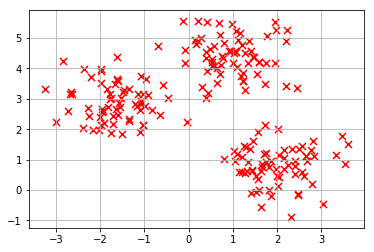

In [82]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c= 'red', marker = 'x', s=50)
plt.grid()
plt.show()

Here, the choice of parameters provide an easy way to percieve how groups
should be made. Yet, the problem is complex, does not have a unique solution in many
cases. For example lets take the same configuration but add more points.

In [83]:
x2, y2= make_blobs(n_samples=20000, n_features=2, 
                  centers=3, cluster_std = 0.65,
                  shuffle = True, random_state = 0)

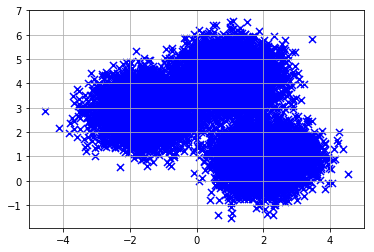

In [84]:
plt.scatter(x2[:,0],x2[:,1],c= 'blue', marker = 'x', s=50)
plt.grid()
plt.show()

the groups are still there, yet the boundary seems more complex to find. Hence, more points
is not necessarily a clearer view of the groups.

Lets now introduce the k-means alogrithm 
it is done in 4 steps:
    
    1- randomly pick k points from the experimental points that will be used as initial centroids
    2- assign seach point to the nearest centroids \muˆ{j}, j\in \left{1..k\right}
    3- move the centroids to the average of points assign to it
    4- repeat 2-3 until convergence or to a maximum of iteration
    
It is very direct. Yet, you can immediately see multiple issues




In [85]:
from sklearn.cluster import KMeans

km    = KMeans(n_clusters=3, init='random', n_init = 5, max_iter = 50, tol = 1e-4, random_state = 0)
y_res = km.fit_predict(x)




lets plot the results 




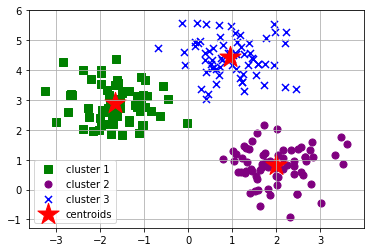

In [86]:
plt.scatter(x[y_res==0,0], x[y_res==0,1], s=50, c='green', marker='s', label = 'cluster 1')
plt.scatter(x[y_res==1,0], x[y_res==1,1], s=50, c='purple', marker='o', label = 'cluster 2')
plt.scatter(x[y_res==2,0], x[y_res==2,1], s=50, c='blue', marker='x', label = 'cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 500, marker= '*', c='red', label= 'centroids')
plt.legend()
plt.grid()
plt.show()



It looks good, yet if we had assume there were 5 centers

In [87]:
km2    = KMeans(n_clusters=5, init='random', n_init = 10, max_iter = 100, tol = 1e-4, random_state = 0)
y_res2 = km2.fit_predict(x)



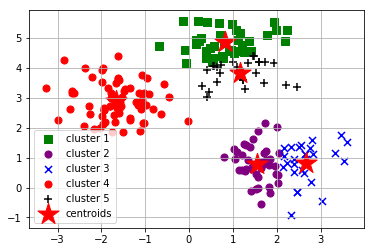

In [88]:
plt.scatter(x[y_res2==0,0], x[y_res2==0,1], s=50, c='green'  , marker='s', label = 'cluster 1')
plt.scatter(x[y_res2==1,0], x[y_res2==1,1], s=50, c='purple' , marker='o', label = 'cluster 2')
plt.scatter(x[y_res2==2,0], x[y_res2==2,1], s=50, c='blue'   , marker='x', label = 'cluster 3')
plt.scatter(x[y_res2==3,0], x[y_res2==3,1], s=50, c='red'    , marker='o', label = 'cluster 4')
plt.scatter(x[y_res2==4,0], x[y_res2==4,1], s=50, c='black'  , marker='+', label = 'cluster 5')

plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], s = 500, marker= '*', c='red', label= 'centroids')
plt.legend()
plt.grid()
plt.show()

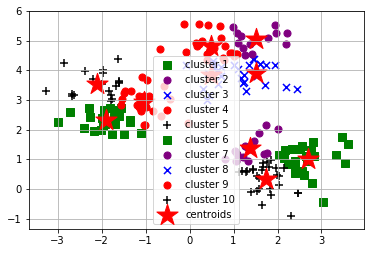

In [89]:
km3    = KMeans(n_clusters=10, init='random', n_init = 10, max_iter = 100, tol = 1e-4, random_state = 0)
y_res3 = km3.fit_predict(x)

plt.scatter(x[y_res3==0,0], x[y_res3==0,1], s=50, c='green'  , marker='s', label = 'cluster 1')
plt.scatter(x[y_res3==1,0], x[y_res3==1,1], s=50, c='purple' , marker='o', label = 'cluster 2')
plt.scatter(x[y_res3==2,0], x[y_res3==2,1], s=50, c='blue'   , marker='x', label = 'cluster 3')
plt.scatter(x[y_res3==3,0], x[y_res3==3,1], s=50, c='red'    , marker='o', label = 'cluster 4')
plt.scatter(x[y_res3==4,0], x[y_res3==4,1], s=50, c='black'  , marker='+', label = 'cluster 5')

plt.scatter(x[y_res3==5,0], x[y_res3==5,1], s=50, c='green'  , marker='s', label = 'cluster 6')
plt.scatter(x[y_res3==6,0], x[y_res3==6,1], s=50, c='purple' , marker='o', label = 'cluster 7')
plt.scatter(x[y_res3==7,0], x[y_res3==7,1], s=50, c='blue'   , marker='x', label = 'cluster 8')
plt.scatter(x[y_res3==8,0], x[y_res3==8,1], s=50, c='red'    , marker='o', label = 'cluster 9')
plt.scatter(x[y_res3==9,0], x[y_res3==9,1], s=50, c='black'  , marker='+', label = 'cluster 10')


plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], s = 500, marker= '*', c='red', label= 'centroids')
plt.legend()
plt.grid()
plt.show()

The algorithm always answer something.Yet, here we know that it does not seem to be the proper solution

Another key point is important. Here, we have assigned ranomdly the first position of the centroids. 
If the data contains numerous points, initial poisition might not allow proper convergence

In [90]:
x_init = np.array([[1, 5], [2, 5], [3,5]])
             
km4    = KMeans(n_clusters=3, init= x_init, n_init = 1, max_iter = 100, tol = 1e-4, random_state = 0)
y_res4 = km4.fit_predict(x)

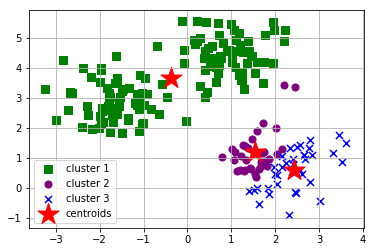

In [91]:
plt.scatter(x[y_res4==0,0], x[y_res4==0,1], s=50, c='green', marker='s', label = 'cluster 1')
plt.scatter(x[y_res4==1,0], x[y_res4==1,1], s=50, c='purple', marker='o', label = 'cluster 2')
plt.scatter(x[y_res4==2,0], x[y_res4==2,1], s=50, c='blue', marker='x', label = 'cluster 3')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], s = 500, marker= '*', c='red', label= 'centroids')
plt.legend()
plt.grid()
plt.show()

you can see here, that the algortihm converged but on the wrong set of centroids. Unsupervised learning requires being extremely carefull as we are trying to find "natural" ways to group data.




There are still debate about initialisation but a common way is called kmean++



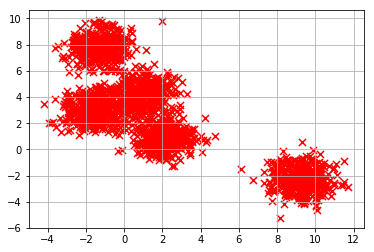

In [92]:
x5, y5 = make_blobs(n_samples=2000, n_features=2, 
                  centers=5, cluster_std = 0.85,
                  shuffle = True, random_state = 0)

plt.scatter(x5[:,0],x5[:,1],c= 'red', marker = 'x', s=50)
plt.grid()
plt.show()


In [93]:
km6    = KMeans(n_clusters=5, init='k-means++', n_init = 5, max_iter = 100, tol = 1e-4, random_state = 0)
y_res6 = km6.fit_predict(x5)

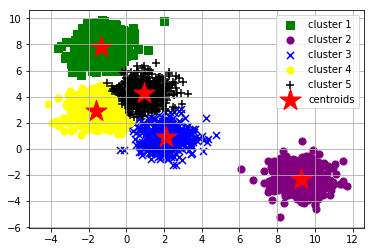

In [94]:
plt.scatter(x5[y_res6==0,0], x5[y_res6==0,1], s=50, c='green'  , marker='s', label = 'cluster 1')
plt.scatter(x5[y_res6==1,0], x5[y_res6==1,1], s=50, c='purple' , marker='o', label = 'cluster 2')
plt.scatter(x5[y_res6==2,0], x5[y_res6==2,1], s=50, c='blue'   , marker='x', label = 'cluster 3')
plt.scatter(x5[y_res6==3,0], x5[y_res6==3,1], s=50, c='yellow'    , marker='o', label = 'cluster 4')
plt.scatter(x5[y_res6==4,0], x5[y_res6==4,1], s=50, c='black'  , marker='+', label = 'cluster 5')

plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1], s = 500, marker= '*', c='red', label= 'centroids')
plt.legend()
plt.grid()
plt.show()

Now the question is: Can we have a criteria to evaluate how many clusters are present.
    
Again multiple methods can be used depending on the criteria chosen to define a proper cluster. 
A common method is called the "elbow method". A natural measure of the quality of the cluster is the total sum of the 
distance between points and their centroids. In python, it is automatically computed during kmeans calculi and is called the inertia_.





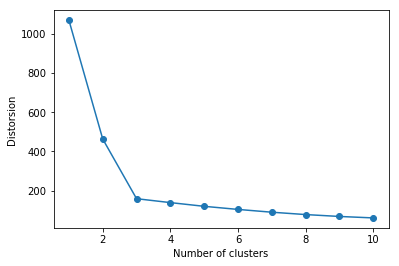

In [95]:
x_test, y_test = make_blobs(n_samples=200, n_features=2, 
                  centers=3, cluster_std = 0.65,
                  shuffle = True, random_state = 0)

distorsions = []
for i in range(1,11):
    km_test = KMeans(n_clusters=i,
                     init='k-means++',
                     n_init=10,
                     max_iter=500,
                     tol=1e-4,
                     random_state=0)
    km_test.fit(x_test)
    distorsions.append(km_test.inertia_)
    
    
plt.plot(range(1, 11), distorsions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distorsion')
plt.show()


here k = 3 is where the reduction of distorsions is becomes smaller. 
This provide an estimate of the good number of cluster.
